In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DatabaseDF = pd.read_csv("../CleanedDataset.csv")

## Definition

The dead cat bounce refers to the effect that occurs when something drops from a high value/production state rapidly, and eventually sees a small resurgence near the end of its fall (a "bounce"). While this is mostly a jokey saying I want to see if the effect holds for oil production. In particular I want to look at the 12 month Cum Prod and seeing if there are cases where the final month's prodution ever jumps up from the previous ones.

In [3]:
BopdDF = pd.melt(DatabaseDF, value_vars = ['Best1 Mo BOPD','Best3 Mo BOPD','Best6 Mo BOPD', 'Best9 Mo BOPD','Best12 Mo BOPD'],
                   var_name = "BOPD Month", value_name = "BOPD Val" ).dropna()

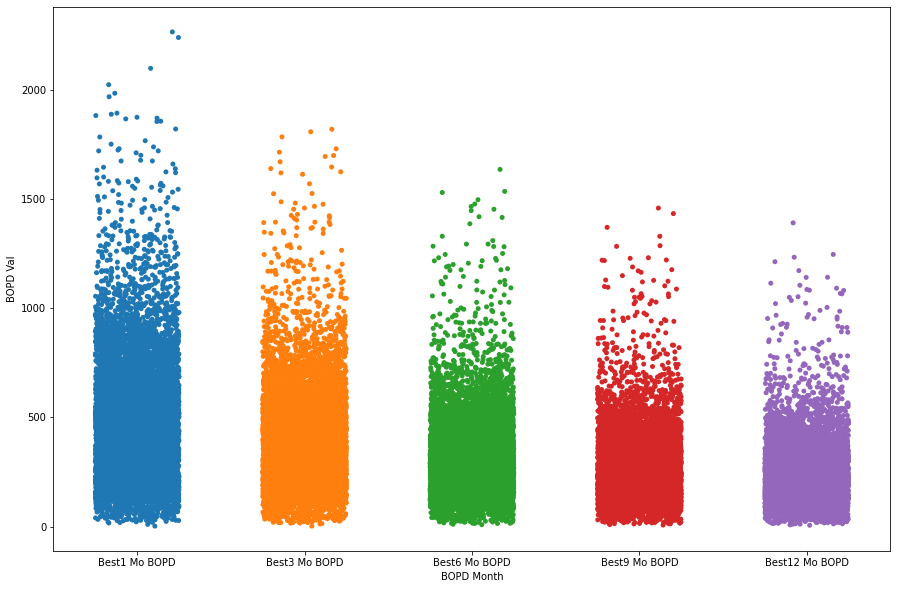

In [4]:
plt.subplots(figsize = (15,10))
sns.stripplot(x = 'BOPD Month', y = 'BOPD Val', data = BopdDF, jitter = .25)

Now while this shows that there is a general decline in BOPD val as the months go on I want to now drop all the values that have strictly decreasing in value, seeing if there are any that exhibit a cat bouncing quality

In [5]:
DatabaseDF = DatabaseDF.fillna(0)

In [6]:
IncreaseDF = DatabaseDF[ ~((DatabaseDF['Best1 Mo BOPD'] >= DatabaseDF['Best3 Mo BOPD']) &
                             (DatabaseDF['Best3 Mo BOPD'] >= DatabaseDF['Best6 Mo BOPD']) &
                             (DatabaseDF['Best6 Mo BOPD'] >= DatabaseDF['Best9 Mo BOPD']) &
                             (DatabaseDF['Best9 Mo BOPD'] >= DatabaseDF['Best12 Mo BOPD']))]

In [7]:
len(IncreaseDF)

0

Wow. Suprisingly not a single well saw an increase in BOPD production as the months went on. They all strictly decreased or stayed the same. A lot of data is missing for some months however so there could still be a possiblity but currently the data decisively shows the dead cat does not bounce for oil production

Review Comments:
Since the data for all of the BOPD production values do not show any indication of the dead cat bounce, this model will not be an accurate representation for our dataset. There is an overall trend that the oil production decreases as the months go on, with no increase. 